# Assignment 2020: Investigating the numpy.random package
***

### Introduction
***

This project investigates the numpy.random package, examining it under the following four headings:
* The overall purpose of the package
* The use of the simple random data and Permutations functions
* The use and purpose of 5 different distributions:
    * Uniform
    * Binomial
    * Normal
    * Poisson
    * ?
* The use of seeds in generating pseudorandom numbers

<br>
In as much as is possible, I show how the various features of the package can be used in data analytics through practical, real-world examples, with the aim of demonstrating the applicability of the package features

<br>

## The Overall Purpose of the Package
***
The generation of random numbers by computers has many important uses in numerous different real-world contexts. These range from the generation of truly random numbers (TRNGs) in the areas of encryption and online gambling, to the ability to generate pseudo random numbers for simluation and modelling applications [1]. In Python programming, the Numpy library provides the random package which allows developers to work with pseudo random numbers (PRNGs). [2]

###### (further investigation)
* Generator and BitGenerator
* default_rng constructor to create instance of Generator
* link between random and probability
* pseudo randomness vs determinism - computers are ultimately deterministic machines


## 1. The simple random data and Permutations functions
***

These functions allow us to generate pseudo-random real numbers within a specified range. Various operations can be performed depending on the desire of the developer. There is a significant amount of functionality crossover between the methods in these sections so it is not necessary to go through each one individually. I will briefly demonstrate some of these functions before applying them practically in the simulation of a deck of playing cards.
***


<br>

First, the numpy library is imported. This provides the full range of tools necessary to fully investigate the package. The `pyplot` module and `pandas` are also used below for visualisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set visualisation style
plt.style.use("ggplot")

Next, the `default_rng()` function is called. This constructs a new Generator, providing access to a range of methods and distributions. 

In [3]:
rng = np.random.default_rng()

<br>

#### Some simple operations

In [4]:
# generate 10 random numbers from 0-9 and append to list lst
lst = []
for i in range(10):
    lst.append(rng.integers(low=10)) 
print(lst)

[3, 1, 2, 2, 0, 1, 1, 8, 6, 4]


In [5]:
# shuffle the elements of lst
rng.shuffle(lst)
print(lst)

[8, 2, 2, 0, 6, 1, 3, 1, 1, 4]


In [6]:
# use random.choice() to choose from elements in lst
choice_list = []
for i in range(10):
    choice_list.append(rng.choice(lst)) # add to choice_list
print(choice_list)

[8, 4, 1, 8, 3, 1, 0, 3, 1, 3]


In [7]:
# Generate a 2d array of 2 rows and 3 columns with values between 1 and 10 exclusive
int_array_2d = rng.integers(1, 10, (2, 3))
print(int_array_2d)

[[5 1 4]
 [7 2 4]]


In [8]:
# Generate a 3d array with values between 1 and 10 inclusive
int_array_3d = rng.integers(1, 10, (2, 3, 4), endpoint=True)
print(int_array_3d)

[[[ 1 10  7  2]
  [ 9  3  3  7]
  [ 1  2  2  4]]

 [[ 5  1  3  1]
  [ 2 10 10  5]
  [ 5 10 10  8]]]


<br>

#### Simulation: Playing cards and probability
***

One of the most important features of the np.random package is that it can be used to simulate real life events and situations. A simple computer program can perform in less than one second, what could take a human days, months or even years to do. These simulations can then be used to make informed predictions and assumptions which can be applied to real life. 


Below, I have written a program which simulates a standard deck of 52 playing cards. The simulation involves creating a standard deck, shuffling it using the `.shuffle()`  method and then drawing a single card at random using the `.choice()` method. The 'card' is then replaced. This is repeated 10,000 times and each card drawn is stored in memory.

Per the package documentation, the `choice()` method assumes a uniform distribution of the elements in the array passed [3]. This is what we want as each card in the deck should have an equal chance of being drawn.

'C6' represents 6 of Clubs, 'SA' Ace of Spades etc.

#### Probability
In order to verify the accuracy of the simulation, the stored cards are analysed in the following ways:
* How many of each suit (clubs, diamonds, hearts, spades) were drawn;
* How many of each specified single card (`test_cards`) were drawn <br>

We know that the probability of drawing a particular suit is **13/52 (25%)**;<br>
And for a single card it is **1/52 (approx. 2%)**

The program demonstrates that the `.random` methods used do indeed accurately simulate the behaviour of playing cards in real life.

The idea for the `make_deck()` function was found in *A Primer on Scientific Programming with Python* by Hans Petter Langtangen [4]

In [9]:
def make_deck():
    
    """
    This function makes a standard deck of 52 playing cards
    """
    
    ranks = ['A', '2', '3', '4', '5', '6', '7',
             '8', '9', '10', 'J', 'Q', 'K']
    suits = ['C', 'D', 'H', 'S']
    deck = []
    for s in suits:
        for r in ranks:
            deck.append(s + r)
        rng.shuffle(deck) # shuffle deck
    return deck

In [10]:
def pick(deck):

    """
    This function picks a single card 10,000 times. It returns a list of the cards and a dictionary of their suits
    """
    
    test_suits = ['C', 'D', 'H', 'S']
    card_list = [] 
    for i in range(10000):
        card = rng.choice(deck)
        card_list.append(card) 
    suit_list = suits(test_suits, card_list) # Call suits() function to create list of suits chosen 
    suit_dict = counts(suit_list) # Call counts() function to create dictionary of suits chosen
    return suit_dict, card_list # Return dictionary of 10,000 suits and list of 10,000 cards

In [11]:
def card_pick(card_list):
    
    """
    This function counts the number of test cards in the card_list
    """
    
    test_cards = ['H6', 'S6', 'C6', 'D6']
    compare_cards = []
    for card in card_list:
        for i in range(len(test_cards)):
            if test_cards[i] == card:
                compare_cards.append(test_cards[i])
    compare_cards_dict = counts(compare_cards)
    return compare_cards_dict

In [12]:
def suits(test_suits, card_list):
    
    """
    This function returns a list containing the suit of each card chosen
    """
    
    suit_list = []
    for card in card_list:
        for i in range(len(test_suits)):
            if test_suits[i] in card:
                suit_list.append(test_suits[i])
    return suit_list

In [13]:
def counts(lst):
    
    """
    This function takes a list as an argument and adds the list items to a dictionary
    """
    
    d = {}
    for item in lst:
        if item in d:
            d[item] += 1
        else:
            d[item] = 1
    return d

In [14]:
deck = (make_deck()) # Make deck
suit_dict, card_list = pick(deck) # Create dictionary of suits and list of single cards drawn
cards_dict = card_pick(card_list) # Create dictionary of test cards

<br>

#### Analysis of output
***

* When we observe the output in the dictionary `suit_dict` we see that each suit was drawn approximately 25% of the time. 
* Similarly, `cards_dict` reveals that single cards are drawn at a rate of approximately 2%. <br>
This is preccisely what we would expect and demonstrates that the simulation mirrors real life playing cards. <br>

I have plotted both dictionaries on a bar chart. We can visualise the distribution clearly. Both suits and single cards are uniformly distributed

In [15]:
# Output suit_dict. Note the value of each suit at approx 2,500, or 10,000/4
print(suit_dict)

{'S': 2505, 'H': 2508, 'D': 2494, 'C': 2493}


Text(0.5, 1.0, 'Suits frequency')

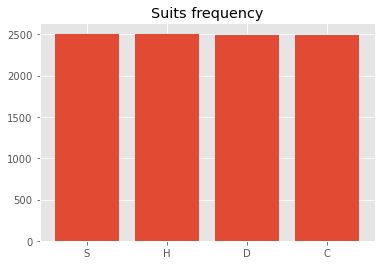

In [16]:
# Plot suit frequency on a bar chart to view uniform distribution
plt.bar(list(suit_dict.keys()), suit_dict.values())
plt.title("Suits frequency")

In [17]:
# Output cards_dict. Note the value of each card at approx. 193 or 10,000/52
print(cards_dict)

{'D6': 193, 'S6': 187, 'C6': 207, 'H6': 182}


Text(0.5, 1.0, 'Single card frequency')

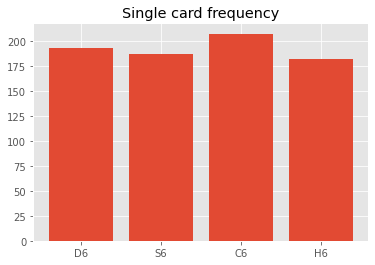

In [18]:
# Output single card frequency on a bar chart to view uniform distribution
plt.bar(list(cards_dict.keys()), cards_dict.values())
plt.title("Single card frequency")

<br>

#### End section 1

<br>

## 2. Distributions
***

The numpy.random package allows us to work with a range of distributions depending on our specific requirements. I examine 5 of these in the present section:

* Uniform
* Binomial
* Normal
* Chi-squared
* ?

Probability distributions tell us how likely it is that a certain event occurs. They have many practical applications, such as the calculation of confidence intervals and critical regions in hypothesis testing [5]. "Statistical intervals and hypothesis tests are often based on specific distributional assumptions" [6]. For example, the t-test is most commonly associated with a normally distributed random variable, while for Chi-squared tests it is the Chi-squared distribution. Simulation is another practical use of probability distributions which is commonly applied in numerous fields. 

In the simulation demonstrated above, the playing cards were drawn at random and distributed uniformly. This is the default distribution for the `rng.choice()` method. Each element in the array passed has an equal probability of being selected which is exactly what we want if we are simulating a standard deck of 52 playing cards. 

It is the uniform distribution which is first explored here via the `rng.uniform()` method.





<br>

### 2.1 Uniform 
***

The `rng.uniform()` function outputs an array of values which are evenly distributed across the interval passed. Each value has an equal chance of being generated. Values outside of the interval never occur and thus have a probability of 0. The probability density function is: $$ p(x) = \frac{1}{b-a}$$

Let us simulate the rolling of an unbiased, 6-sided die. This can be done using the `rng.integers()` method. By default (as with `rng.choice()` above), it will generate integers with a uniform distribution:

<br>

##### Dice rolling: Discrete vs Continuous  

In [19]:
# Roll 6-sided die 10 times
die_roll = rng.integers(1, 7, 10)
print(die_roll)

[2 5 3 1 2 2 2 1 6 5]


If we use the `rng.uniform()` method with the same arguments, we note a significant difference - the output will be floats:

In [20]:
die_roll_float = rng.uniform(1, 7, 10)
print(die_roll_float)

[3.07164682 5.31886495 1.60741937 5.50697495 2.76866413 6.50263744
 4.59587799 4.91074852 2.49629231 3.82903287]


This points to an important characteristic of the method: it generates data with a *continuous proabability distribution*. That is, it is "a probability distribution in which the random variable X can take on any value" [7]. This contrasts with the discrete uniform distribution generated by the `integers()` method, more suited to simulating a die which has only discrete values. In a continuous uniform distribution, each variable has an equal chance of being observed and that variable has an infinite number of possible values.



<br>

##### Plotting the uniform distribution
***
Below, I generate some data that follows a uniform distribution and plot it first on a histogram. It appears flat, taking on the characteristic appearance of the uniform distribution. I then plot its probability density function (PDF). Visualisation enables us to understand more clearly that each observation of the random variable is equally distributed across the interval.

In [21]:
# Generate an array of random variables in a uniform distribution
uni = np.random.default_rng().uniform(-10,5,10000)

<function matplotlib.pyplot.show(*args, **kw)>

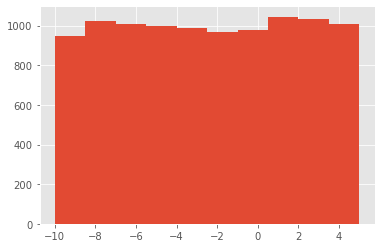

In [22]:
# Plot the distribution using a histogram
plt.hist(uni)
plt.show

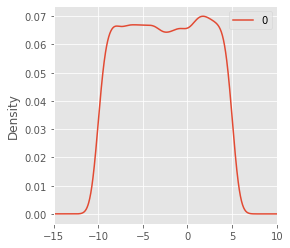

In [23]:
# Plot the density function using Pandas library
pd.DataFrame(uni).plot(kind="density", figsize=(4,4), xlim=(-15, 10))

##### (add conclusion here)

<br>

### 2.2 Binomial
***

The binomial distribution is an example of a *discrete probability distribution*. It is used to model a given number of random trials (represented by parameter *n* in the `.binomial()` method) for some experiment or event [8]. 

##### Coin toss
To demonstrate the binomial distribution in practical terms, the coin toss example is often used [9], [10], [11]. When we toss a fair coin, there are only two possible outcomes - heads or tails - and each outcome has an equal probability (*p=0.5*) of arising. If we say that 'heads' denotes a 'success', we can perform the coin toss *n* number of times, counting the number of successes we observe. This number will have a binomial distribution.

Using `rng.binomial` below, I simulate the coin toss and plot the resulting distribution on a histogram. There are 10 trials (n=10), with a 50% probability of success (p=0.5). This is performed 1,000 times. [12]

Calculate the probability that ...



In [24]:
n, p = 10, .5  # number of trials, probability of each trial
unbiased_coin = rng.binomial(n, p, 10000) # result of tossing a coin 10 times, tested 1000 times.

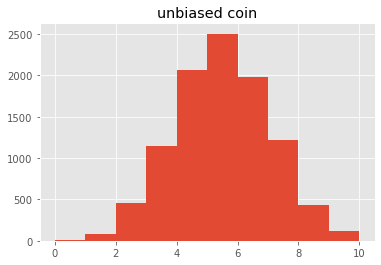

In [25]:
plt.hist(unbiased_coin)
plt.title("unbiased coin")
plt.show()

<br>

This has the appearance of a normal distribution (explored below). If the probability of success is changed however (i.e. we add a bias to the coin), we observe a change in the distribution - it becomes asymmetrical:

In [26]:
n, p = 10, .75  # number of trials, probability of each trial
biased_coin = rng.binomial(n, p, 10000) # result of tossing a coin 10 times, tested 1000 times.

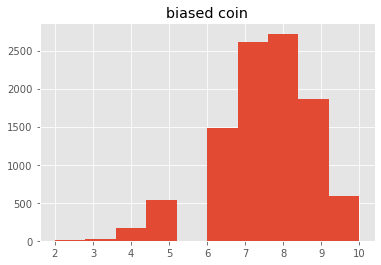

In [27]:
plt.hist(biased_coin)
plt.title("biased coin")
plt.show()

##### use binomial to calculate probability

### 2.3 Normal
***
The normal distribution, also known as the Gaussian distribution or bell curve, is a continuous probability distribution which is often considered to be the most important in the field of statistics because of the frequency of its occurrence in the natural world [1]. This explains why it is often used to model random variables. The probability density function (pdf) of the normal distribution is expressed as:

$$ p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})}$$

where $\mu$ (mu) is the mean or median and $\sigma$ (sigma) is the standard deviation. The pdf gives the height of the curve at point $x$ [2]. A random variable has an increasing probability of being generated the closer its value to the mean. More specifically, in normal distributions, approximately 68% of the data falls within one standard deviation of the the mean, 95% within 2 standard deviations and 99.7% within 3 standard deviations. [3]

Using the numpy.random package, we can draw random samples from a normal distribution through the random.Generator.normal method. The desired mean and standard deviation are passed as parameters to the function and a specified number of samples are derived. 

**References** <br>
[1] Frost, Jim; Normal Distribution in Statistics;	https://statisticsbyjim.com/basics/normal-distribution/ <br>
[2] JB Statistics; An Introduction to the Normal Distribution; https://www.youtube.com/watch?v=iYiOVISWXS4 <br>
[3] Python for Data 22: Probability Distributions https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions <br>

In [28]:
# Return a single sample value from a normally distributed variable with mean=5 and standard deviation=3
rng.normal(loc=5, scale=3)

2.277314500021027

In [29]:
# Return a 1d array of 50 values of a normally distributed random variable with mean=5 and standard deviation=3
norm = rng.normal(loc=5, scale=3, size=50)
norm

array([10.22795563,  4.60463069,  8.62530808,  6.44477051,  7.70491804,
        3.17568866,  4.50987225,  2.27340008, 11.46918687,  3.17210396,
        5.02016996,  0.36231881,  4.01464051,  5.02154903,  0.92980869,
       -2.84760483,  2.82099758,  4.81834166,  9.87855781,  0.57242052,
        2.24020769,  6.17000129,  6.23149839,  7.93085683,  5.05674992,
        0.30915998,  6.11180695,  3.36462176,  6.72002618,  5.40247262,
        6.28939241,  3.16036036, 10.18445746,  3.31123145,  5.46190942,
        6.31897648,  6.58386616,  9.45236054,  5.27441091,  5.76865174,
        5.44384008,  8.06147382, -0.44438901,  6.95738766,  3.3990278 ,
        1.85040033,  3.71228668,  6.8938288 ,  3.68923549,  6.99890017])

Plot the distribution using a histogram:

(array([ 1.,  1.,  4.,  4.,  9., 10., 12.,  3.,  3.,  3.]),
 array([-2.84760483, -1.41592566,  0.01575351,  1.44743268,  2.87911185,
         4.31079102,  5.74247019,  7.17414936,  8.60582853, 10.0375077 ,
        11.46918687]),
 <a list of 10 Patch objects>)

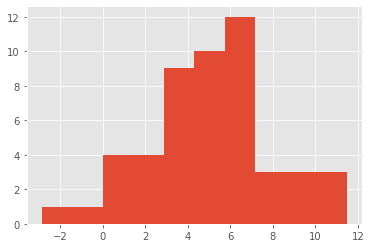

In [30]:
plt.hist(norm)

The more samples we plot, the more the histogram resembles the classic symmetric shape associated with normal distribution:

(array([  16.,   96.,  523., 1547., 2848., 2762., 1556.,  534.,  106.,
          12.]),
 array([-6.57232356, -4.26687565, -1.96142774,  0.34402017,  2.64946809,
         4.954916  ,  7.26036391,  9.56581182, 11.87125973, 14.17670765,
        16.48215556]),
 <a list of 10 Patch objects>)

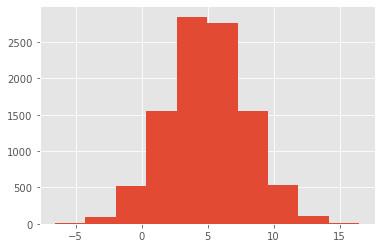

In [31]:
norm1 = rng.normal(loc=5, scale=3, size=10000)
plt.hist(norm1)

In [32]:
# We would expect the mean of the distribution to be close to the value assigned (5)
np.mean(norm1)

4.966536589562189

In [33]:
# We would expect the standard deviation to be close to value assigned (3)
np.std(norm1)

3.0271196341835216

***
A standard normal distribution has a mean of 0 and standard deviation of 1. The standard normal distribution is explored below with the associated density function

In [34]:
# Draw samples from a standard normal distribution
mu, sigma = 0, 1

norm2 = np.random.default_rng().normal(mu, sigma, 10000)

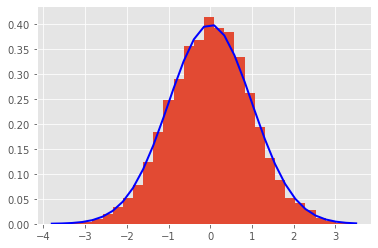

In [35]:
# Taken from the numpy.random documentation, use matplotlib to plot the
# probability density function for a standard normal distribution
count, bins, ignored = plt.hist(norm2, 30, density=True)

# The probability density function is coded out and passed
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='b')

plt.show()

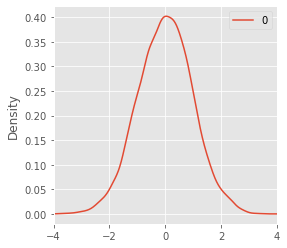

In [36]:
# Plot density function using Pandas
pd.DataFrame(norm2).plot(kind="density", figsize=(4,4), xlim=(-4, 4))

The standard deviation (sigma) determines the width of the curve. The lower the std, the higher the probability of the random variable being closer to the mean. We can visualise the affect of lowering or raising the value of sigma when we plot the distributions on plots of equal dimension. [4]

[4] *code take from:* Lecture 18;  https://www.math.uci.edu/~isik/teaching/17W_MATH9/notes/Lecture18.html

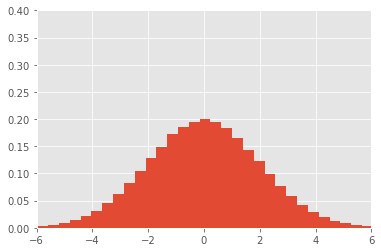

In [37]:
# With a mean of 0 and standard deviation of 2
N = 500000
mu = 0.0
sigma = 2.0 
norm3 = np.random.default_rng().normal(mu, sigma, size=N)
plt.axis([-6, 6, 0, 0.40])
_,_,_ = plt.hist(norm3, 50, density=True)

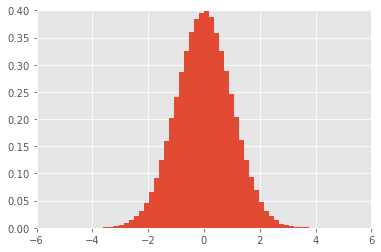

In [38]:
# Lowering the standard deviation we can see the curve narrows 
N = 500000
mu = 0.0
sigma = 1.0 # lower standard deviation
norm4 = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, 0.40])
_,_,_ = plt.hist(norm4, 50, density=True)

### 2.4 Poisson 
***
2 assumptions 1. each time measurement must have the same weight - same chance of turning up - probabilities are equal
    2. Each observation is independent of the others
    
First, estimate the mean (good practice with any distribution)

## Seeds
#### Explain the use of seeds in generating random numbers
***

The seed refers to the initial number (or vector) from which all subsequent numbers are generated in a pseudorandom number generator [13]. So long as the seed (and generator algorithm) is unknown to the user, the numbers generated will appear random. However, it is possible to discover this number and so to determine the 'random' numbers that are calculated from it, as it is generated by a human-made computer program (i.e. deterministic). It is this fact that gives the numbers generated their *pseudorandom* nature. 

The default generator used by the current version of Numpy.random is the *PCG64* (Permuted Congruential Generator). The use of this algorithm is a departure from the legacy `RandomState` package whose `BitGenerator` is the MT19937 (Mersenne Twister) [14]. Still today, the Mersenne Twister algorithm is the most widely used general purpose PRNG [15]. In deciding to replace the PCG with the MT19937, the following reasoning was assessed:

"The main downsides of MT19937 are mostly that it is slower than some of the available alternatives, due to its very large state, and that it fails some statistical quality tests", while regarding the PCG, "the main downside is that it uses 128-bit integer arithmetic, which is emulated in C if the compiler does not provide such an integer type" [16]. In weighing up these pros and cons, efficiency was prioritised and the PCG was chosen.

#### Setting the seed
***
Seed in Numpy.random (v1.15 vs v1.19) 

Some analysts have recommended to avoid using the legacy approach of setting the seed via `np.random.seed`, even though this approach can still be taken under the current version [17]. Using `np.random.seed` resets the seed of the *global* PRNG, which is created as soon as Numpy is imported:

In [39]:
np.random.seed(12)
x = np.random.randint(1, 700)

In [40]:
print(x)

668


In [41]:
print(x)

668


Rather, it is advised to create a single RNG (and seed it if desired) at the beginning of a script:

In [42]:
rng = np.random.default_rng(12)
x = rng.integers(1, 10, 10)

In [43]:
print(x)

[6 3 9 9 1 2 2 2 6 4]


In [44]:
print(x)

[6 3 9 9 1 2 2 2 6 4]


Setting the seed of the global PRNG can cause issues when attempting to use `np.random` functions somewhere else in the codebase. As advised by Robert Kern, "The preferred best practice for getting reproducible pseudorandom numbers is to instantiate a generator object with a seed and pass it around [18]."

<br>

***

#### Setting the seed for reproducibility

In the analysis of data, there are certain occasions when the generation of random numbers will be necessary. For example, if we want to simulate some real life event where randomness is integral to the observations we make, we need to be able to recreate this randomness in our simulation to maximise accuracy in our analysis. There are also occasions however, when we will need to make use of a *seed*. Using a seed allows for reproducibility, which is a very important practice in data science. For example, when splitting data into training and testing sets, using a seed will guarantee that our data is split in the same way for each iteration of our code [19]. The short program below demonstrates this.

In this example I split the *Salary_Data* ([20]) dataset into separate train and test sets using Scikit-learn's `train_test_split` method. The seed is set using the *random_state* argument. This creates a reproducible model. It is basic but it is reproducible nonetheless. This is something that is highly valued in data analytics, not least because reproducibility is the " ...only thing that an investigator can guarantee about a study" [21].

This program trains a simple linear regression model, however the primary focus here is the use of the seed. 

In [45]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Plotting the data on a scatter plot we can see clearly that a simple linear regression model would be best suited.

<br>

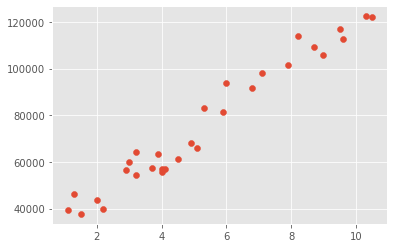

In [46]:
plt.scatter(df['YearsExperience'], df['Salary'])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.iloc[:, :-1].values

In [49]:
Y = df.iloc[:, 1].values

<br>

The random_state argument is passed here, setting the seed.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

In [51]:
first_run = X_train

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

In [53]:
second_run = X_train

In [54]:
print(np.all(first_run == second_run))

True


Fit the data to a linear regression model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression()

In [57]:
clf.predict(X_test)

array([ 71949.71942864,  55791.24921078,  53890.25271456, 115672.63884167,
        44385.27023347,  63395.23519566])

In [58]:
Y_test

array([ 67938.,  64445.,  60150., 116969.,  43525.,  55794.])

In [59]:
# check the accuracy of the model
clf.score(X_test, Y_test)

0.940882728477622

## References

[1] https://dataconomy.com/2017/12/random-data-can-benefit-business/ <br>
[2] https://numpy.org/doc/stable/reference/random/index.html <br>
[3] https://numpy.org/doc/stable/reference/random/generated /numpy.random.Generator.choice.html#numpy.random.Generator.choice <br>
[4] Langtangen, Hans Petter; A Primer on Scientific Programming with Python; Springer-Verlag Berlin Heidelberg, 2016; viewed at http://hplgit.github.io/primer.html/doc/pub/random/._random-readable002.html <br>
[5] Engineering Statistics Handbook; Probability Distributions; https://www.itl.nist.gov/div898/handbook/eda/section3/eda36.htm <br>
[6] *Ibid*
[7] Nichoal School of the Environment; Continuous Probability Distributions https://sites.nicholas.duke.edu/statsreview/continuous-probability-distributions/ <br>
[8] Hamel, Greg; Python for Data 22: Probability Distributions; https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions <br>
[9] *Ibid* <br>
[10] onlinestatsbook.com; Binomial Distribution; http://onlinestatbook.com/2/probability/binomial.html <br>
[11] Wikipedia; Bernoulli Trial; https://en.wikipedia.org/wiki/Bernoulli_trial <br>
[12] numpy.org; numpy.random.Generator.binomial; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial <br>
[13] Wikipedia; Random Seed; https://en.wikipedia.org/wiki/Random_seed <br>
[14] Kern, R; Decide on new PRNG BitGenerator default; https://github.com/numpy/numpy/issues/13635
[15] Wikipedia; Random Seed; https://en.wikipedia.org/wiki/Random_seed <br>
[16] Kern, R; Decide on new PRNG BitGenerator default; https://github.com/numpy/numpy/issues/13635<br>
[17] Thomas, A; Good practices with numpy random number generators; https://albertcthomas.github.io/good-practices-random-number-generators/<br>
[18] Kern, A; quoted in *Ibid.*<br>
[19] Bansaal, J.; How to Use Random Seeds Effectively; https://www.acornanalytics.com/how-to-use-random-seeds-effectively/ <br>
[20] Github repo; https://github.com/LakshmiPanguluri/Linear_Multiple_Regression <br>
[21] Peng, R; The Real Reason Reproducible Research is Important; https://simplystatistics.org/2014/06/06/the-real-reason-reproducible-research-is-important/ <br>
